# PK/PD AL Artemether PMax analysis
# Date: 07/29/2025

## Analyzing ```pmax_artemether``` effect on different weights and seperating them by genotype efficacy
## By scaling ```pmax_artemether``` by a factor

<br>

In [4]:
import subprocess
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count
import os
import sys
import time
import datetime 
from math import *

<br>

# AL max efficacy: 96.5%, ```pmax_artemether``` = ```pmax_artemether * 0.3```

In [5]:
# Function to run a single simulation for a given weight value

def run_single_weight_simulation(n_patients, pmax_artemether, weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", str(n_patients),
        "--pmax_artemether", str(pmax_artemether),
        "--ec50_lum", "72.789",
        "--weight", str(weight),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split() for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ARTEMETHER", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_weight[df_weight['PARASITEDENSITY'] >= 10].shape[0]
        total_patients = df_weight['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        return efficacy, df_weight, pmax_artemether, failed_treatment_count

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, pmax_artemether, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, pmax_artemether, 0  # Return NaN, None, and 0 in case of failure

In [10]:
os.getcwd()


'/home/venitha_b/Projects/2019-test-ppq-pk/model_calibration_AL/bassat_baraka_2009/072025/07292025/pmax_factor_artemether_vs_weight_by_genotype/AL_max_efficacy'

In [11]:
home_dir = "/home/venitha_b/Projects/2019-test-ppq-pk/model_calibration_AL/bassat_baraka_2009/072025/07292025/pmax_factor_artemether_vs_weight_by_genotype/AL_max_efficacy"
os.chdir(home_dir)
os.getcwd()

'/home/venitha_b/Projects/2019-test-ppq-pk/model_calibration_AL/bassat_baraka_2009/072025/07292025/pmax_factor_artemether_vs_weight_by_genotype/AL_max_efficacy'

In [59]:
0.99999999984 * 1.05

1.049999999832

In [58]:
pmax_values_final = []
# File suffix for saving results
pmax_factor = 1.05
file_suffix = f"AL_max_efficacy_96.5_factor_{pmax_factor}"

In [60]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99999999984 * pmax_factor]
weight_values = [5]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 5kg and pmax_artemether: 1.049999999832


Today's date:  2025-07-29 

Length of simulation:  0:00:12.141120 


The failed treatment count for weight 5kg and pmax_artemether 1.049999999832 is: 0

The percentage efficacy for weight 5kg and pmax_artemether 1.049999999832 is: 100.0 



In [35]:
pmax_values_final.append(0.99999999984 * pmax_factor)

In [36]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.999999993 * pmax_factor]
weight_values = [10]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 10kg and pmax_artemether: 0.999999993


Today's date:  2025-07-29 

Length of simulation:  0:00:12.423480 


The failed treatment count for weight 10kg and pmax_artemether 0.999999993 is: 31

The percentage efficacy for weight 10kg and pmax_artemether 0.999999993 is: 93.7875751503006 



In [37]:
pmax_values_final.append(0.999999993 * pmax_factor)

In [39]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.9999992 * pmax_factor]
weight_values = [15]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 15kg and pmax_artemether: 0.9999992


Today's date:  2025-07-29 

Length of simulation:  0:00:12.097548 


The failed treatment count for weight 15kg and pmax_artemether 0.9999992 is: 39

The percentage efficacy for weight 15kg and pmax_artemether 0.9999992 is: 92.18436873747495 



In [41]:
pmax_values_final.append(0.9999992 * pmax_factor)

In [42]:
pmax_values_final

[0.99999999984, 0.999999993, 0.9999992]

In [43]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.9999984 * pmax_factor]
weight_values = [20]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 20kg and pmax_artemether: 0.9999984


Today's date:  2025-07-29 

Length of simulation:  0:00:11.248348 


The failed treatment count for weight 20kg and pmax_artemether 0.9999984 is: 39

The percentage efficacy for weight 20kg and pmax_artemether 0.9999984 is: 92.18436873747495 



In [44]:
pmax_values_final.append(0.9999984*pmax_factor)

In [45]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.999982 * pmax_factor]
weight_values = [25]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 25kg and pmax_artemether: 0.999982


Today's date:  2025-07-29 

Length of simulation:  0:00:11.814416 


The failed treatment count for weight 25kg and pmax_artemether 0.999982 is: 31

The percentage efficacy for weight 25kg and pmax_artemether 0.999982 is: 93.7875751503006 



In [46]:
pmax_values_final.append(0.999982 * pmax_factor)
pmax_values_final

[0.99999999984, 0.999999993, 0.9999992, 0.9999984, 0.999982]

In [47]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99997 * pmax_factor]
weight_values = [30]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 30kg and pmax_artemether: 0.99997


Today's date:  2025-07-29 

Length of simulation:  0:00:12.700954 


The failed treatment count for weight 30kg and pmax_artemether 0.99997 is: 37

The percentage efficacy for weight 30kg and pmax_artemether 0.99997 is: 92.58517034068136 



In [48]:
pmax_values_final.append(0.99997 * pmax_factor)
pmax_values_final

[0.99999999984, 0.999999993, 0.9999992, 0.9999984, 0.999982, 0.99997]

In [49]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99992 * pmax_factor]
weight_values = [35]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 35kg and pmax_artemether: 0.99992


Today's date:  2025-07-29 

Length of simulation:  0:00:10.583302 


The failed treatment count for weight 35kg and pmax_artemether 0.99992 is: 28

The percentage efficacy for weight 35kg and pmax_artemether 0.99992 is: 94.38877755511022 



In [50]:
pmax_values_final.append(0.99992 * pmax_factor)
pmax_values_final

[0.99999999984, 0.999999993, 0.9999992, 0.9999984, 0.999982, 0.99997, 0.99992]

In [51]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99984 * pmax_factor]
weight_values = [40]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 40kg and pmax_artemether: 0.99984


Today's date:  2025-07-29 

Length of simulation:  0:00:12.227152 


The failed treatment count for weight 40kg and pmax_artemether 0.99984 is: 26

The percentage efficacy for weight 40kg and pmax_artemether 0.99984 is: 94.78957915831663 



In [52]:
pmax_values_final.append(0.99984 * pmax_factor)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984]

In [56]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99975 * pmax_factor]
weight_values = [45]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 45kg and pmax_artemether: 0.99975


Today's date:  2025-07-29 

Length of simulation:  0:00:11.598665 


The failed treatment count for weight 45kg and pmax_artemether 0.99975 is: 45

The percentage efficacy for weight 45kg and pmax_artemether 0.99975 is: 90.98196392785572 



In [54]:
pmax_values_final.append(0.99975 * pmax_factor)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975]

In [55]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99975 * pmax_factor] 
weight_values = [50]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/{file_suffix}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/{file_suffix}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 50kg and pmax_artemether: 0.99975


Today's date:  2025-07-29 

Length of simulation:  0:00:12.958974 


The failed treatment count for weight 50kg and pmax_artemether 0.99975 is: 42

The percentage efficacy for weight 50kg and pmax_artemether 0.99975 is: 91.58316633266533 



In [57]:
pmax_values_final.append(0.99975 * pmax_factor)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975]

In [114]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99973]
weight_values = [55]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 55kg and pmax_artemether: 0.99973


Today's date:  2025-07-24 

Length of simulation:  0:00:12.676931 


The failed treatment count for weight 55kg and pmax_artemether 0.99973 is: 37

The percentage efficacy for weight 55kg and pmax_artemether 0.99973 is: 92.58517034068136 



In [115]:
pmax_values_final.append(0.99973)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973]

In [117]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99972]
weight_values = [60]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 60kg and pmax_artemether: 0.99972


Today's date:  2025-07-24 

Length of simulation:  0:00:12.548253 


The failed treatment count for weight 60kg and pmax_artemether 0.99972 is: 39

The percentage efficacy for weight 60kg and pmax_artemether 0.99972 is: 92.18436873747495 



In [118]:
pmax_values_final.append(0.99972)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972]

In [120]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.9997]
weight_values = [65]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 65kg and pmax_artemether: 0.9997


Today's date:  2025-07-24 

Length of simulation:  0:00:11.879762 


The failed treatment count for weight 65kg and pmax_artemether 0.9997 is: 35

The percentage efficacy for weight 65kg and pmax_artemether 0.9997 is: 92.98597194388778 



In [121]:
pmax_values_final.append(0.9997)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997]

In [124]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99962]
weight_values = [70]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 70kg and pmax_artemether: 0.99962


Today's date:  2025-07-24 

Length of simulation:  0:00:12.150369 


The failed treatment count for weight 70kg and pmax_artemether 0.99962 is: 39

The percentage efficacy for weight 70kg and pmax_artemether 0.99962 is: 92.18436873747495 



In [125]:
pmax_values_final.append(0.99962)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962]

In [127]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99962]
weight_values = [75]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 75kg and pmax_artemether: 0.99962


Today's date:  2025-07-24 

Length of simulation:  0:00:12.160284 


The failed treatment count for weight 75kg and pmax_artemether 0.99962 is: 35

The percentage efficacy for weight 75kg and pmax_artemether 0.99962 is: 92.98597194388778 



In [128]:
pmax_values_final.append(0.99962)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962,
 0.99962]

In [132]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.9996]
weight_values = [80]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 80kg and pmax_artemether: 0.9996


Today's date:  2025-07-24 

Length of simulation:  0:00:12.043695 


The failed treatment count for weight 80kg and pmax_artemether 0.9996 is: 37

The percentage efficacy for weight 80kg and pmax_artemether 0.9996 is: 92.58517034068136 



In [133]:
pmax_values_final.append(0.9996)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962,
 0.99962,
 0.9996]

In [135]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99959]
weight_values = [85]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 85kg and pmax_artemether: 0.99959


Today's date:  2025-07-24 

Length of simulation:  0:00:12.360870 


The failed treatment count for weight 85kg and pmax_artemether 0.99959 is: 39

The percentage efficacy for weight 85kg and pmax_artemether 0.99959 is: 92.18436873747495 



In [136]:
pmax_values_final.append(0.99959)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962,
 0.99962,
 0.9996,
 0.99959]

In [145]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.99955]
weight_values = [90]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 90kg and pmax_artemether: 0.99955


Today's date:  2025-07-24 

Length of simulation:  0:00:12.524464 


The failed treatment count for weight 90kg and pmax_artemether 0.99955 is: 41

The percentage efficacy for weight 90kg and pmax_artemether 0.99955 is: 91.78356713426854 



In [146]:
pmax_values_final.append(0.99955)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962,
 0.99962,
 0.9996,
 0.99959,
 0.99955]

In [149]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.9996]
weight_values = [95]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 95kg and pmax_artemether: 0.9996


Today's date:  2025-07-24 

Length of simulation:  0:00:12.759573 


The failed treatment count for weight 95kg and pmax_artemether 0.9996 is: 36

The percentage efficacy for weight 95kg and pmax_artemether 0.9996 is: 92.78557114228457 



In [150]:
pmax_values_final.append(0.9996)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962,
 0.99962,
 0.9996,
 0.99959,
 0.99955,
 0.9996]

In [152]:
n_patients = 500  # Number of patients to simulate
pmax_values = [0.9994]
weight_values = [100]

for weight in weight_values:
        # Create a directory for the results if it doesn't exist
        os.makedirs(f"{home_dir}/results/weight_{weight}kg", exist_ok=True)
        # Change the current working directory to the results directory
        os.chdir(f"{home_dir}/results/weight_{weight}kg")
        for pmax in pmax_values:
            print(f"\nRunning simulation for weight: {weight}kg and pmax_artemether: {pmax}\n")
            efficacy, df_weight, pmax_artemether, failed_treatment_count = run_single_weight_simulation(n_patients, pmax, weight)
            # Save the DataFrame to a pickle file
            df_weight.to_pickle(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
            # Save the DataFrame to a CSV file
            df_weight.to_csv(f"df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.csv", index=False)
            print(f"\nThe failed treatment count for weight {weight}kg and pmax_artemether {pmax_artemether} is:", failed_treatment_count)
            print(f"\nThe percentage efficacy for weight {weight}kg and pmax_artemether {pmax_artemether} is:", efficacy, "\n")


Running simulation for weight: 100kg and pmax_artemether: 0.9994


Today's date:  2025-07-24 

Length of simulation:  0:00:12.647409 


The failed treatment count for weight 100kg and pmax_artemether 0.9994 is: 38

The percentage efficacy for weight 100kg and pmax_artemether 0.9994 is: 92.38476953907815 



In [153]:
pmax_values_final.append(0.9994)
pmax_values_final

[0.99999999984,
 0.999999993,
 0.9999992,
 0.9999984,
 0.999982,
 0.99997,
 0.99992,
 0.99984,
 0.99975,
 0.99975,
 0.99973,
 0.99972,
 0.9997,
 0.99962,
 0.99962,
 0.9996,
 0.99959,
 0.99955,
 0.9996,
 0.9994]

In [156]:
file_suffix = "AL_pfcrtK76_92.5"

In [159]:
# Load the dataframes
# Calculate the efficacy for each weight group
os.chdir(home_dir)
# Define the weight values to use
weight_values = np.arange(5,105,5)
pmax_values = pmax_values_final

#weight_values = [54]
n_patients = 500  # Number of patients to simulate


failed_treatment_count = []
efficacy = []
pmax_artemether_values = []
weight_values_expanded = []
df_weight_compiled = []

for weight, pmax_artemether in zip(weight_values, pmax_values):
        # Load the dataframe
        df_weight = pd.read_pickle(f"{home_dir}/results/weight_{weight}kg/df_weight_{weight}kg_pmax{pmax_artemether}_{file_suffix}.pyobj")
        # Calculate the efficacy
        failed_treatment_count.append(df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0])
        total_patients = df_weight['PID'].nunique()
        efficacy.append((1 - (failed_treatment_count[-1] / total_patients)) * 100 if total_patients > 0 else np.nan)
        pmax_artemether_values.append(pmax_artemether)
        weight_values_expanded.append(weight)
        # Append the dataframe to the list
        df_weight_compiled.append(df_weight)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Weight': weight_values_expanded,
    'Pmax Artemether': pmax_artemether_values,
    'Failed Treatment Count': failed_treatment_count,
    'Efficacy': efficacy
})

# Save the results to a CSV file
results_df.to_csv(f"efficacy_results_compiled_{file_suffix}.csv", index=False)
# Save the results to a pickle file
results_df.to_pickle(f"efficacy_results_compiled_{file_suffix}.pyobj")
# Print the results
print("\nEfficacy Results:")
print(results_df)
 


Efficacy Results:
    Weight  Pmax Artemether  Failed Treatment Count   Efficacy
0        5         1.000000                      36  92.785571
1       10         1.000000                      38  92.384770
2       15         0.999999                      37  92.585170
3       20         0.999998                      35  92.985972
4       25         0.999982                      34  93.186373
5       30         0.999970                      39  92.184369
6       35         0.999920                      35  92.985972
7       40         0.999840                      38  92.384770
8       45         0.999750                      39  92.184369
9       50         0.999750                      39  92.184369
10      55         0.999730                      37  92.585170
11      60         0.999720                      39  92.184369
12      65         0.999700                      35  92.985972
13      70         0.999620                      39  92.184369
14      75         0.999620         

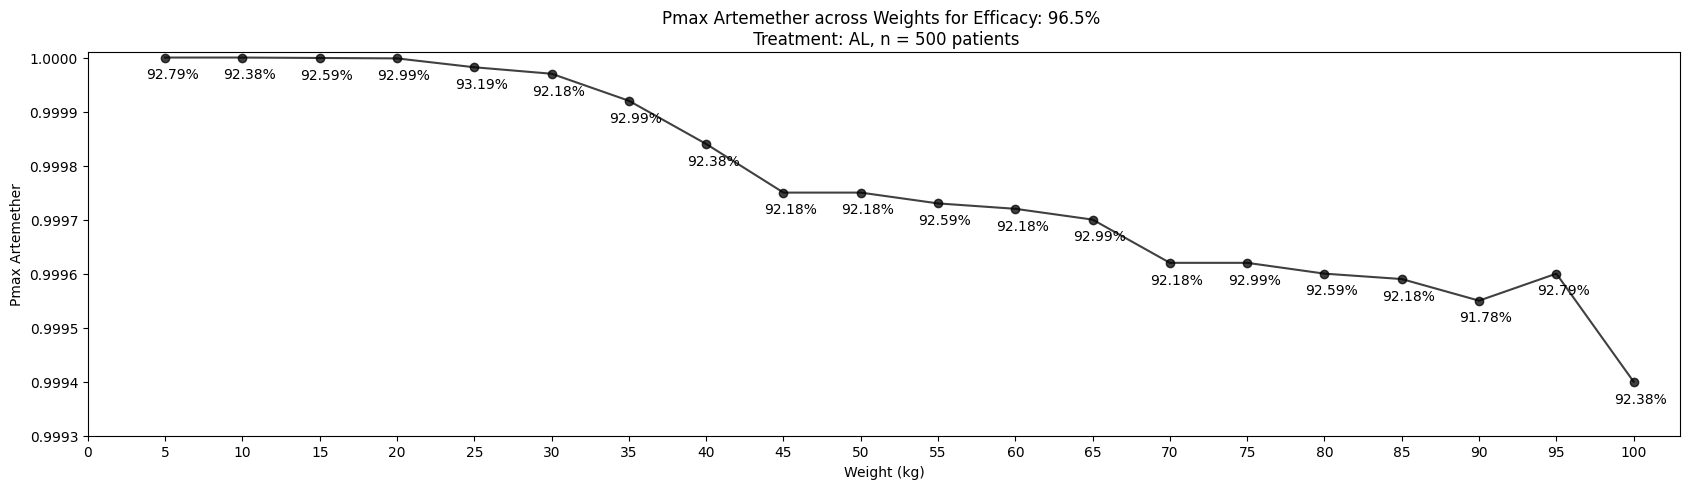

In [ ]:

os.chdir(home_dir)
# efficacy_01 = results_df[(results_df['Efficacy'] >= 91.0) & (results_df['Efficacy'] <= 98.5)]  # Filter for efficacies around 96.5% 
plt.figure(figsize=(20, 5))
weight_values = results_df['Weight'].unique()  # Get unique weight values
colors = plt.get_cmap('tab20').colors

plt.plot(results_df['Weight'], results_df['Pmax Artemether'], marker='o', linestyle='-', color='black', alpha = 0.75)  # Connect points with a line

for x,y in zip(results_df['Weight'], results_df['Pmax Artemether']):
    label_efficacy = f"{results_df[results_df['Weight'] == x]['Efficacy'].iloc[0].round(2)}%"
    #label_pmax = f"{results_df[results_df['Weight'] == x]['Pmax Artemether'].iloc[0].round(8)}"
    #label = f"{label_efficacy}\n({label_pmax})"
    plt.annotate(label_efficacy, xy=(x, y), textcoords="offset points", xytext=(5,-15), ha='center', fontsize=10)

plt.xlim(min(results_df['Weight']-5), 103)  # Set x-axis limits
plt.xticks(np.arange(0,101,5))  # Set x-ticks to weight values
plt.xlabel(f'Weight (kg)') # Simplified xlabel
plt.ylabel('Pmax Artemether')
plt.title(f"Pmax Artemether across Weights for pfcrtK76 Efficacy: 92.5% \n Treatment: AL, n = {n_patients} patients")
#plt.grid(True)

#plt.xticks(rotation=45, ha='right') # Rotates labels for better readability

# Set y-axis limits
y_tick_positions = np.linspace(min(results_df['Pmax Artemether']), max(results_df['Pmax Artemether']), 50)
y_tick_positions = y_tick_positions[0:-1]

plt.ylim(0.9993, 1.00001)  # Set y-axis limits
plt.yticks(np.arange(0.9993, 1.00001, 0.0001))  # Set y-ticks to specific values

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

plt.savefig(f"pkpd_{file_suffix}_02.png")
plt.show()

In [166]:
children_weight = results_df[results_df['Weight'] <= 30]
children_weight

,Weight,Pmax Artemether,Failed Treatment Count,Efficacy
0,5,1.000000,36,92.785571
1,10,1.000000,38,92.384770
2,15,0.999999,37,92.585170
3,20,0.999998,35,92.985972
4,25,0.999982,34,93.186373
5,30,0.999970,39,92.184369


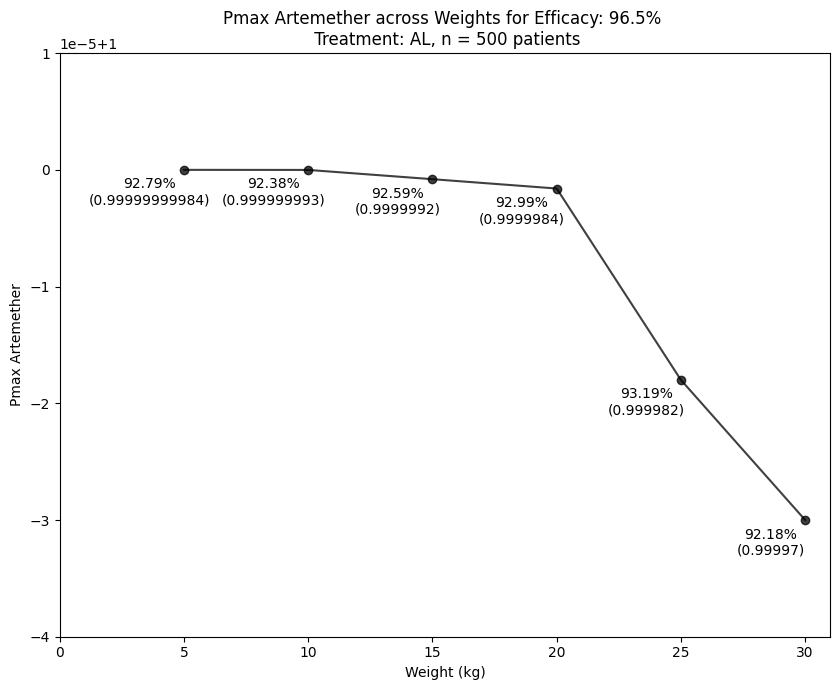

In [ ]:

plt.figure(figsize=(10, 7))

weight_values = children_weight['Weight'].unique()  # Get unique weight values
colors = plt.get_cmap('tab20').colors

plt.plot(children_weight['Weight'], children_weight['Pmax Artemether'], marker='o', linestyle='-', color='black', alpha = 0.75)  # Connect points with a line

for x,y in zip(children_weight['Weight'], children_weight['Pmax Artemether']):
    label_efficacy = f"{children_weight[children_weight['Weight'] == x]['Efficacy'].iloc[0].round(2)}%"
    label_pmax = f"{children_weight[children_weight['Weight'] == x]['Pmax Artemether'].iloc[0]}"
    label = f"{label_efficacy}\n({label_pmax})"
    plt.annotate(label , xy=(x, y), textcoords="offset points", xytext=(-25,-25), ha='center', fontsize=10)


plt.xlim(0, 31)  # Set x-axis limits
plt.xticks(np.arange(0,31,5))  # Set x-ticks to weight values
plt.xlabel(f'Weight (kg)') # Simplified xlabel
plt.ylabel('Pmax Artemether')
plt.title(f"Pmax Artemether across Weights for pfcrtK76 Efficacy: 92.5%\n Treatment: AL, n = {n_patients} patients")
#plt.grid(True)

#plt.xticks(rotation=45, ha='right') # Rotates labels for better readability

# Set y-axis limits
# y_tick_positions = np.linspace(min(children_weight['Pmax Artemether']), max(children_weight['Pmax Artemether']), 50)
# y_tick_positions = y_tick_positions[0:-1]

plt.ylim(0.99996, 1.00001)  # Set y-axis limits
plt.yticks(np.arange(0.99996, 1.00001, 0.00001))  # Set y-ticks to specific values

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

plt.savefig(f"pkpd_{file_suffix}_03.png")
plt.show()

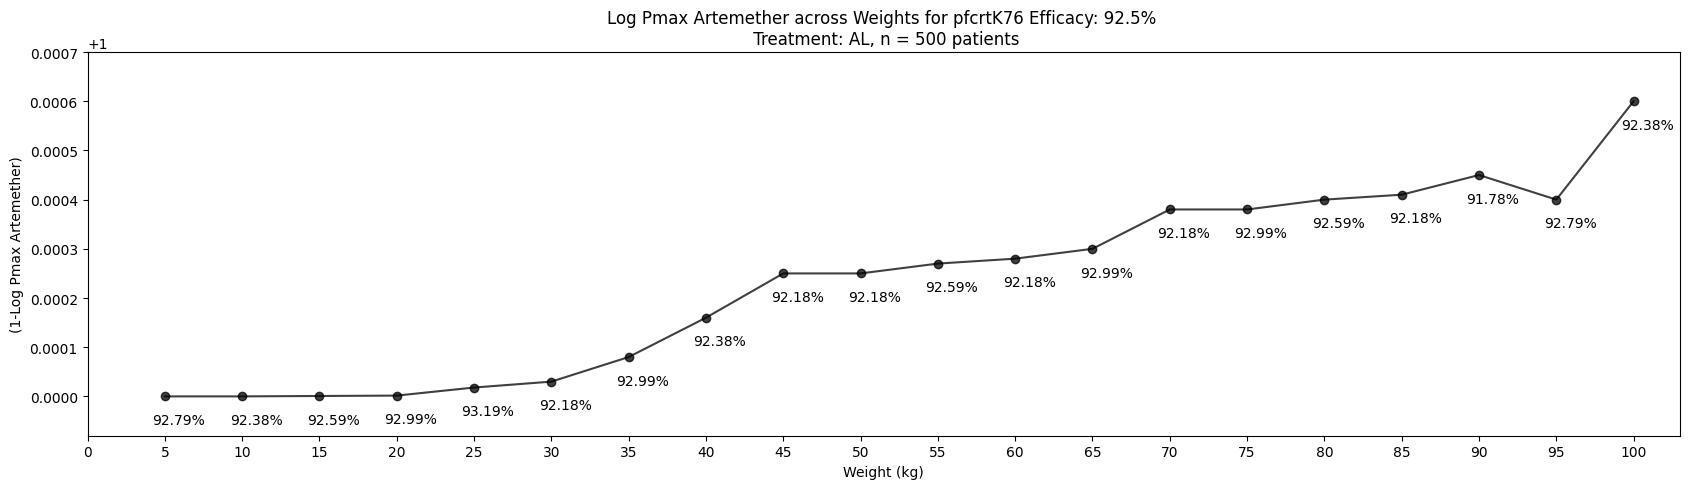

In [192]:

results_df['Log_Pmax Artemether'] = np.log(results_df['Pmax Artemether'])  # Add a new column for log-transformed Pmax Artemether
results_df['Log_Pmax Artemether_Transformed'] = 1- results_df['Log_Pmax Artemether']  # Transform the log values for better visualization
#efficacy_01 = results_df[(results_df['Efficacy'] >= 91.0) & (results_df['Efficacy'] <= 98.5)]  # Filter for efficacies around 96.5% 
plt.figure(figsize=(20, 5))
weight_values = results_df['Weight'].unique()  # Get unique weight values
colors = plt.get_cmap('tab20').colors

plt.plot(results_df['Weight'], results_df['Log_Pmax Artemether_Transformed'], marker='o', linestyle='-', color='black', alpha = 0.75)  # Connect points with a line

for x,y in zip(results_df['Weight'], results_df['Log_Pmax Artemether_Transformed']):
    label_efficacy = f"{results_df[results_df['Weight'] == x]['Efficacy'].iloc[0].round(2)}%"
    #label_pmax = f"{results_df[results_df['Weight'] == x]['Pmax Artemether'].iloc[0].round(8)}"
    #label = f"{label_efficacy}\n({label_pmax})"
    plt.annotate(label_efficacy, xy=(x, y), textcoords="offset points", xytext=(10,-20), ha='center', fontsize=10)

plt.xlim(min(results_df['Weight']-5), 103)  # Set x-axis limits
plt.xticks(np.arange(0,101,5))  # Set x-ticks to weight values
plt.xlabel(f'Weight (kg)') # Simplified xlabel
plt.ylabel('(1-Log Pmax Artemether)')
plt.title(f"Log Pmax Artemether across Weights for pfcrtK76 Efficacy: 92.5% \n Treatment: AL, n = {n_patients} patients")
#plt.grid(True)

#plt.xticks(rotation=45, ha='right') # Rotates labels for better readability

# Set y-axis limits
y_tick_positions = np.linspace(min(results_df['Log_Pmax Artemether_Transformed']), max(results_df['Log_Pmax Artemether_Transformed']), 50)
y_tick_positions = y_tick_positions[0:-1]

plt.ylim(1-0.00008, 1.0007)  # Set y-axis limits
# plt.yticks(np.arange(0.99970, 1.00001, 0.00005))  # Set y-ticks to specific values

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

plt.savefig(f"pkpd_{file_suffix}_log_pmax_transformed.png")
plt.show()

In [193]:
children_weight = results_df[results_df['Weight'] <= 30]
children_weight

,Weight,Pmax Artemether,Failed Treatment Count,Efficacy,Log_Pmax Artemether,Log_Pmax Artemether_Transformed
0,5,1.000000,36,92.785571,-1.600000e-10,1.000000
1,10,1.000000,38,92.384770,-7.000000e-09,1.000000
2,15,0.999999,37,92.585170,-8.000003e-07,1.000001
3,20,0.999998,35,92.985972,-1.600001e-06,1.000002
4,25,0.999982,34,93.186373,-1.800016e-05,1.000018
5,30,0.999970,39,92.184369,-3.000045e-05,1.000030


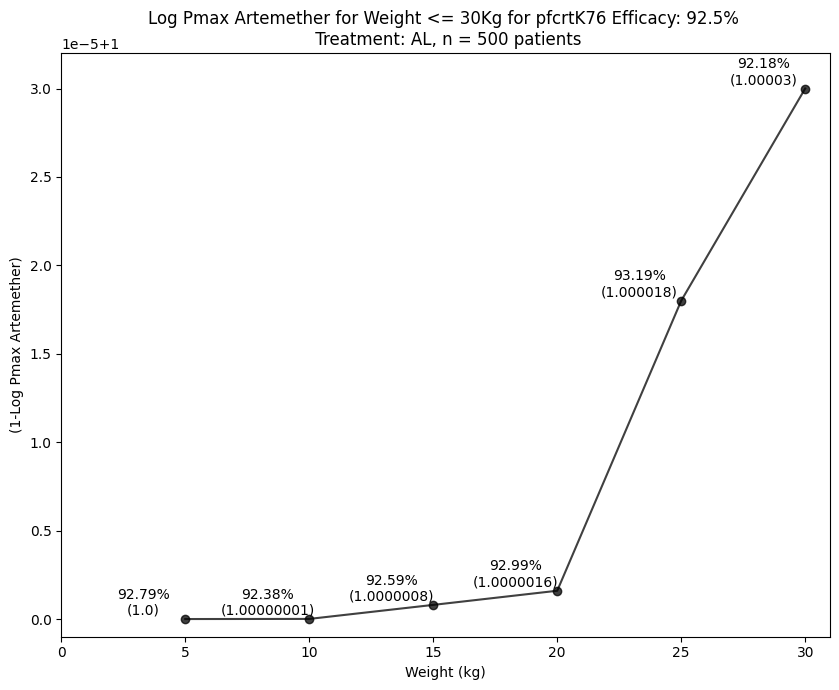

In [203]:

plt.figure(figsize=(10, 7))

weight_values = children_weight['Weight'].unique()  # Get unique weight values
colors = plt.get_cmap('tab20').colors

plt.plot(children_weight['Weight'], children_weight['Log_Pmax Artemether_Transformed'], marker='o', linestyle='-', color='black', alpha = 0.75)  # Connect points with a line

for x,y in zip(children_weight['Weight'], children_weight['Log_Pmax Artemether_Transformed']):
    label_efficacy = f"{children_weight[children_weight['Weight'] == x]['Efficacy'].iloc[0].round(2)}%"
    label_pmax = f"{children_weight[children_weight['Weight'] == x]['Log_Pmax Artemether_Transformed'].iloc[0].round(8)}"
    label = f"{label_efficacy}\n({label_pmax})"
    plt.annotate(label , xy=(x, y), textcoords="offset points", xytext=(-30,3), ha='center', fontsize=10)


plt.xlim(0, 31)  # Set x-axis limits
plt.xticks(np.arange(0,31,5))  # Set x-ticks to weight values
plt.xlabel(f'Weight (kg)') # Simplified xlabel
plt.ylabel('(1-Log Pmax Artemether)')
plt.title(f"Log Pmax Artemether for Weight <= 30Kg for pfcrtK76 Efficacy: 92.5% \n Treatment: AL, n = {n_patients} patients")
#plt.grid(True)

#plt.xticks(rotation=45, ha='right') # Rotates labels for better readability

# Set y-axis limits
# y_tick_positions = np.linspace(min(children_weight['Pmax Artemether']), max(children_weight['Pmax Artemether']), 50)
# y_tick_positions = y_tick_positions[0:-1]

plt.ylim(min(children_weight['Log_Pmax Artemether_Transformed'])-0.000001, max(children_weight['Log_Pmax Artemether_Transformed'])+0.000002)  # Set y-axis limits
# plt.yticks(np.arange(0.99970, 1.00001, 0.00005))  # Set y-ticks to specific values

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

plt.savefig(f"pkpd_{file_suffix}_log_pmax_transformed_children.png")
plt.show()